### Contours

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

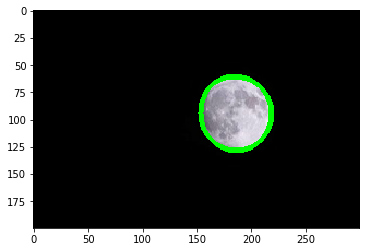

In [55]:
img = cv2.imread('../Data/moon.jpg')
img2 = np.copy(img)
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


#threshold를 이용하여 binary image로 변환
ret, thresh = cv2.threshold(imgray, 50, 255, 0) # 여기서 threshold 메소드의 임계값 기준을 잘 정해야 한다.

image, contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img2, contours, -1, (0,255,0), 3)

plt.imshow(image)
plt.show()

여러 장의 사진이 있다면 명암이 제각기 다르므로 `cv2.adaptiveThreshold()`를 사용해야 할 것이다.

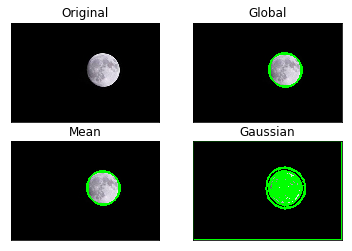

In [56]:
th2 = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
th3 = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15, 2)
th = [0, 0, th2, th3]
titles = ['Original','Global','Mean','Gaussian']
images = [img, image, image2, image3]

for i in range(4):
    img2 = np.copy(img)
    if i in [2, 3]:
        image, contours, hierachy = cv2.findContours(th[i], cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        image = cv2.drawContours(img2, contours, -1, (0,255,0), 3)
    plt.subplot(2,2,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])    
plt.show()